<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/imageClassification.jpeg" alt="Drawing" style="width:1700px;">


# <center> **09.  Image classification!** </center>



##  **Outline**
1. [**Working with an image dataset: mnist**](#topic1)
2. [**Image classification**](#topic1)
3. [**Image representation for classification**](#topic1)


In [1]:
#@title 1. MONTAR EL DRIVE { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA1/ai-uis-student')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/course-IA1/ai-uis-student


In [2]:
#@title 2. LOAD LIB { display-mode: "form" }
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **1. Working with an image dataset: MNIST** <a name="topic1"></a> 

**Load and explore the dataset!**

Mnist has a set of  handwritten digit images with an specific recognition task challenge. Each row has 785 values, the first column corresponds to the digitl label, and the 784 rest values is a vectorized image of $28 \times 28 $. So, we need to form $\mathbf{X}$ matrix and the corresponding $\mathbf{y}$ vector. Each pixel has an intensity of $[ 0 - 255 ]$

In [7]:
#@title **code** Information about dataset
mnist = pd.read_csv("data/mnist1.5k.csv.gz", header=None).values.astype(float)
print( "dimension de los datos originales", mnist.shape)
X=mnist[:,1:785]
y=mnist[:,0]
print( "dimension de las imagenes y las clases", X.shape, y.shape)
print( "luminosidad maxima", np.max(X))
print( "luminosidad minimo", np.min(X))

dimension de los datos originales (1500, 785)
dimension de las imagenes y las clases (1500, 784) (1500,)
luminosidad maxima 255.0
luminosidad minimo 0.0


Now, we will show some random examples of digits. We use `reshape` to convert a vector of 784 elements in a matrix of size: $(28 \times 28)$ and we interpolate to better visualize the images.

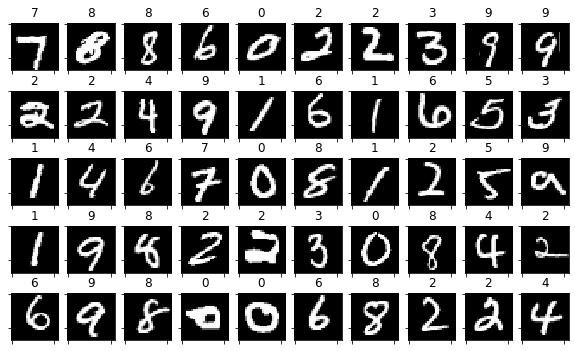

In [8]:
#@title **code** See some examples
perm = np.random.permutation(range(X.shape[0]))[0:50]
random_imgs   = X[perm]
random_labels = y[perm] 
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

Now we can see the distribution of classes, i.e., how many images we have for each digit


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- How is the distribution class?
- Is it a balanced dataset?

In [9]:
#@title **code** Counting samples
print( "digito   número de imágenes")
for i in np.unique(y):
    print( "   ",int(i), "   ", np.sum(y==i))

digito   número de imágenes
    0     150
    1     157
    2     186
    3     125
    4     151
    5     138
    6     152
    7     154
    8     141
    9     146


# **2. Image classification** <a name="topic2"></a>

**Training and prediction**

Firstly we use the **Naive Bayes** algorithm for classification. For fast evaluation, we split the dataset on $80\%$ for training and the rest $20 \%$ for test. 


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">


- How is the algorithm performance?
- Is it appropiate for digit classification
- In which digit classes has more mistakes?
- Why?

In [10]:
#@title **code** Running a classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
test_size = 0.2
#by defautl is 0.25 in test.

d_train, d_test, c_train, c_test = train_test_split(X, y, test_size=test_size)
print( d_train.shape, d_test.shape)
print( c_train.shape, c_test.shape)

g = GaussianNB()
g.fit(d_train, c_train)
print( "acierto en train", g.score(d_train, c_train))
print( "acierto en test ", g.score(d_test, c_test))


(1200, 784) (300, 784)
(1200,) (300,)
acierto en train 0.6658333333333334
acierto en test  0.5933333333333334


In [11]:
#@title **code** Using SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
test_size = 0.2

d_train, d_test, c_train, c_test = train_test_split(X,y,test_size=test_size)

print( "dimensiones train", d_train.shape, c_train.shape)
print( "dimsensions test ", d_test.shape, c_test.shape)

g = SVC(kernel='rbf')
g.fit(d_train, c_train)
print( "acierto en train", g.score(d_train, c_train))
print( "acierto en test ", g.score(d_test, c_test))

predicciones_train = g.predict(d_train)
predicciones_test  = g.predict(d_test)

cm_train=confusion_matrix(c_train, predicciones_train)
cm_test = confusion_matrix(c_test, predicciones_test)
print( "matrix de confusión en train\n", cm_train)
print ("matrix de confusión en test\n", cm_test)
print( "verifica número de imágenes en total por fila")
print( np.sum(cm_test, axis=1))

dimensiones train (1200, 784) (1200,)
dimsensions test  (300, 784) (300,)
acierto en train 0.985
acierto en test  0.9133333333333333
matrix de confusión en train
 [[130   0   0   0   0   0   0   0   0   0]
 [  0 123   1   0   0   0   0   0   1   0]
 [  0   0 153   0   0   0   0   2   0   0]
 [  0   0   2  92   0   1   0   1   0   0]
 [  0   0   0   0 111   0   0   0   0   1]
 [  0   0   0   0   0  97   1   0   0   0]
 [  0   0   0   0   0   0 130   0   0   0]
 [  0   1   1   0   0   0   0 128   0   0]
 [  0   1   0   0   0   0   0   0 108   0]
 [  0   0   0   0   2   0   0   2   1 110]]
matrix de confusión en test
 [[20  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0  1 28  0  1  0  0  0  1  0]
 [ 0  0  0 27  0  1  0  0  1  0]
 [ 0  0  1  1 35  0  0  0  0  2]
 [ 0  0  0  1  0 36  3  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0]
 [ 0  1  0  0  0  0  0 21  0  2]
 [ 0  0  0  3  0  1  0  1 25  2]
 [ 1  0  0  0  0  1  0  1  0 28]]
verifica número de imágenes en total por fila


In [12]:
c_test

array([3., 8., 5., 3., 3., 0., 9., 5., 9., 9., 7., 5., 6., 5., 4., 5., 8.,
       9., 5., 8., 8., 3., 5., 1., 1., 5., 1., 4., 1., 2., 1., 2., 5., 3.,
       7., 5., 0., 8., 2., 4., 7., 4., 4., 1., 8., 6., 9., 8., 8., 3., 9.,
       3., 4., 4., 3., 1., 9., 4., 1., 2., 5., 7., 2., 6., 9., 3., 4., 4.,
       3., 6., 6., 5., 3., 8., 7., 5., 8., 5., 6., 3., 5., 7., 6., 4., 2.,
       9., 9., 9., 3., 5., 9., 6., 3., 9., 5., 3., 1., 5., 5., 3., 2., 1.,
       5., 9., 7., 8., 9., 5., 9., 4., 2., 1., 2., 7., 8., 9., 8., 1., 5.,
       2., 9., 4., 4., 4., 5., 5., 8., 0., 2., 3., 8., 1., 2., 7., 7., 2.,
       6., 9., 6., 0., 6., 6., 5., 9., 3., 0., 3., 6., 6., 0., 9., 4., 2.,
       8., 1., 7., 4., 6., 3., 7., 3., 6., 6., 1., 2., 0., 9., 8., 5., 7.,
       0., 4., 6., 3., 8., 9., 0., 2., 1., 1., 6., 2., 7., 2., 5., 8., 2.,
       7., 4., 2., 9., 5., 4., 5., 1., 4., 7., 7., 1., 8., 2., 5., 2., 7.,
       9., 0., 7., 5., 6., 8., 3., 1., 5., 8., 8., 8., 4., 7., 3., 9., 7.,
       5., 3., 4., 4., 1.

In [13]:
predicciones_test

array([3., 8., 5., 3., 3., 0., 9., 5., 9., 9., 7., 6., 6., 5., 4., 5., 8.,
       9., 3., 8., 8., 3., 5., 1., 1., 5., 1., 4., 1., 2., 1., 2., 5., 3.,
       7., 6., 0., 8., 2., 4., 7., 4., 4., 1., 8., 6., 9., 7., 8., 3., 9.,
       3., 4., 4., 5., 1., 9., 4., 1., 2., 5., 7., 4., 6., 9., 3., 4., 4.,
       3., 6., 6., 5., 3., 3., 7., 5., 3., 5., 6., 3., 5., 9., 6., 4., 2.,
       9., 9., 9., 3., 5., 9., 6., 3., 9., 5., 3., 1., 5., 5., 3., 2., 1.,
       5., 9., 7., 3., 9., 5., 9., 4., 2., 1., 8., 1., 8., 9., 8., 1., 5.,
       2., 5., 4., 4., 4., 5., 5., 8., 0., 2., 3., 8., 1., 2., 7., 7., 2.,
       6., 9., 6., 0., 6., 6., 5., 9., 3., 0., 3., 6., 6., 0., 9., 2., 2.,
       8., 1., 7., 9., 6., 3., 7., 3., 6., 6., 1., 2., 0., 9., 8., 5., 7.,
       0., 4., 6., 8., 8., 9., 0., 2., 1., 1., 6., 2., 7., 2., 6., 8., 2.,
       7., 4., 1., 0., 5., 4., 5., 1., 4., 7., 7., 1., 5., 2., 5., 2., 7.,
       9., 0., 7., 5., 6., 8., 3., 1., 5., 8., 8., 8., 4., 7., 3., 9., 7.,
       5., 3., 4., 4., 1.

cross validated classification

In [15]:
#@title **code** Crossvalidation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import *

s = cross_val_score(GaussianNB(), X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.603 (+/- 0.03471)


In [16]:
#@title **code** Crossvalidation with RF
from sklearn.ensemble import RandomForestClassifier
s = cross_val_score(SVC(kernel='poly'), X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.877 (+/- 0.02741)


# **3. Image representation for classification** <a name="topic3"></a>

We can use hundreds of matemathical representations for images. For instance, we can use the histogram of gray levels. This representation is a vector of 255 values, in which each value has a count of hom many pixels there exist for each intensity.

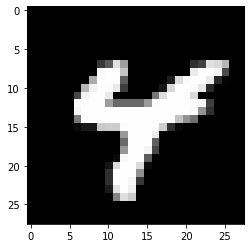

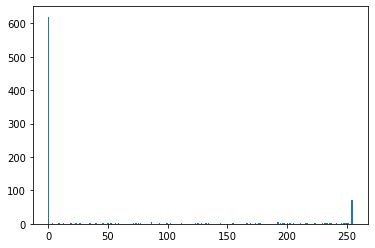

In [ ]:
#@title **code** Images as histograms!
random_idx = np.random.randint(X.shape[0])
hist = np.histogram(X[random_idx], bins=255)[0];
plt.imshow(X[random_idx].reshape(28,28),interpolation="nearest", cmap = plt.cm.Greys_r);
plt.figure();
plt.hist(X[random_idx], bins=255);

we can represent whole images  as hitograms

In [17]:
#@title **code** Transforming whole dataset
d_hist = np.zeros((X.shape[0], 50))
for i in range(X.shape[0]):
    d_hist[i] = np.histogram(X[i], bins=50)[0]
print( d_hist.shape)

(1500, 50)


In [18]:
#@title **code**  Crossvalidation
s = cross_val_score(GaussianNB(), d_hist, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))) 

accuracy 0.234 (+/- 0.01482)


In [19]:
#@title **code** Crossvalidation with RF
s = cross_val_score(RandomForestClassifier(), d_hist, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print( "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.273 (+/- 0.01971)


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Why histograms are not a proper representation in this task?

## **3.1 Using PCA**

In [22]:
#@title **code** from pipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

p = Pipeline((("pca", PCA(n_components=50)), ("classifier", SVC(kernel='rbf')) ))
s = cross_val_score(p, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print( "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.927 (+/- 0.01647)


We can perform tunning about components

In [23]:
#@title **code** searching best hyperparameters
n_components = range(10,160,10)
means, stds = [], []
for n in n_components:
    print( n,)
    p = Pipeline((("pca", PCA(n_components=n)), ("classifier", SVC(kernel= 'poly')) ))
    s = cross_val_score(p, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means = np.r_[means]
stds  = np.r_[stds]


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150


Text(0.5, 1.0, 'GaussianNB')

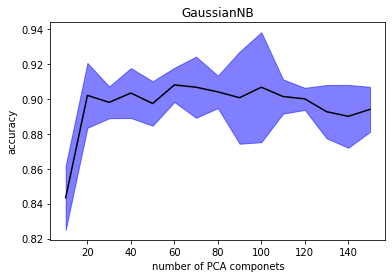

In [24]:
#@title **code** Plotting results
plt.plot(n_components, means, color="black")
plt.fill_between(n_components, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("number of PCA componets")
plt.ylabel("accuracy")
plt.title("GaussianNB")

In [ ]:
#@title **code** from pipeline
p = Pipeline((("pca", PCA(n_components=100)), ("classifier", RandomForestClassifier()) ))
s = cross_val_score(p, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print( "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.851 (+/- 0.02888)


In [ ]:
#@title **code** searching best hyperparameters
n_components = range(10,160,10)
means, stds = [], []
for n in n_components:
    print n,
    p = Pipeline((("pca", PCA(n_components=n)), ("classifier", RandomForestClassifier()) ))
    s = cross_val_score(p, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means = np.r_[means]
stds  = np.r_[stds]

10 20 30 40 50 60 70 80 90 100 110 120 130 140 150


Text(0.5, 1.0, 'RandomForestClassifier')

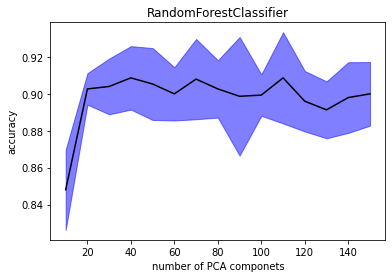

In [ ]:
#@title **code** plotting results
plt.plot(n_components, means, color="black")
plt.fill_between(n_components, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("number of PCA componets")
plt.ylabel("accuracy")
plt.title("RandomForestClassifier")

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Can we use other image representation?
- What about convolution?

# **References**

[1] Imagenet: http://www.image-net.org/


[2] Not NMIST: http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html

http://yaroslavvb.com/upload/notMNIST/



---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;">
